In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans as sklKMeans
from sklearn.metrics import silhouette_score
data = pd.read_csv("Iris.csv")
X = data[["SepalLengthCm","PetalLengthCm"]]

In [4]:
def kMeans(X,k):

    distortion = []
    for i in range(1,k+1):
        model = sklKMeans(n_clusters=i,init='random',n_init='auto',max_iter=10).fit(X.values)
        distortion.append(model.inertia_)
    print(f"Silhoutte Score for {k} cluster is {silhouette_score(X,model.labels_)}")
    return model,distortion
k=5
centroids,distortion  = kMeans(X,k)

TypeError: '<=' not supported between instances of 'str' and 'int'

In [5]:
centroids = model.cluster_centers_
index = model.labels_
plt.figure(figsize=(14,7))
plt.scatter(x=centroids[:,0],y=centroids[:,1],marker="+",c='b',linewidth=16)
sns.scatterplot(data=data,x="SepalLengthCm",y="PetalLengthCm",hue=index,palette="coolwarm")
plt.grid()
plt.savefig("K-Means_iris")

NameError: name 'model' is not defined

#  gmm

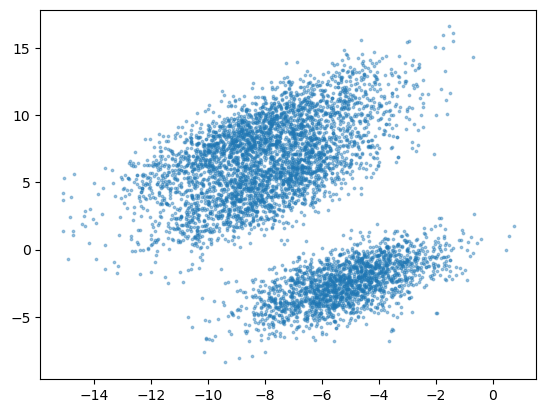

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
def gen_data(k=3, dim=2, points_per_cluster=2000, lim=[-10, 10]):
    x = []
    mean = np.random.rand(k, dim)*(lim[1]-lim[0]) + lim[0]
    for i in range(k):
        cov = np.random.rand(dim, dim+10)
        cov = np.matmul(cov, cov.T)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
    x = np.array(x)
    if(dim == 2):
        fig = plt.figure()
        ax = fig.gca()
        ax.scatter(x[:,0], x[:,1], s=3, alpha=0.4)
        ax.autoscale(enable=True)
    return x
data = gen_data()

In [7]:
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

GaussianMixture(n_components=3)

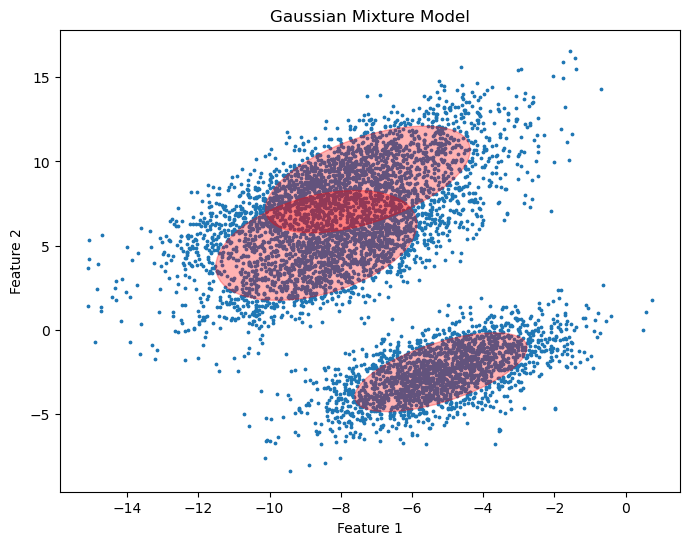

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1],s=3)
for covar, mean in zip(gmm.covariances_, gmm.means_):
    v, w = np.linalg.eigh(covar)
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180 + angle, color='r', alpha=0.3)
    plt.gca().add_patch(ell)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model')
plt.show()